### Visualizing models over variables

In [79]:
%matplotlib inline

In [114]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [115]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [116]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [117]:
df.shape

(458311, 37)

In [118]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

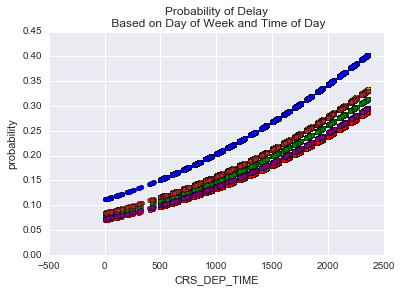

In [119]:
# note that features represents day of week here
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


In [120]:
zip(features,colors)

[('dow_1', 'blue'),
 ('dow_2', 'green'),
 ('dow_3', 'red'),
 ('dow_4', 'purple'),
 ('dow_5', 'orange'),
 ('dow_6', 'brown')]

### Other Answers: visualizing probability of delay against departure time and Airline carrier 

In [121]:
df.columns

Index([u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'DEST_AIRPORT_ID',
       u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID', u'CRS_DEP_TIME',
       u'DEP_TIME', u'DEP_DEL15', u'Unnamed: 15', u'carrier_AA', u'carrier_AS',
       u'carrier_B6', u'carrier_DL', u'carrier_EV', u'carrier_F9',
       u'carrier_HA', u'carrier_MQ', u'carrier_NK', u'carrier_OO',
       u'carrier_UA', u'carrier_US', u'carrier_VX', u'carrier_WN', u'dow_1',
       u'dow_2', u'dow_3', u'dow_4', u'dow_5', u'dow_6', u'dow_7',
       u'probability'],
      dtype='object')

In [122]:
import numpy as np
time_vals = np.linspace(0,2400,30)

In [123]:
time_vals

array([    0.        ,    82.75862069,   165.51724138,   248.27586207,
         331.03448276,   413.79310345,   496.55172414,   579.31034483,
         662.06896552,   744.82758621,   827.5862069 ,   910.34482759,
         993.10344828,  1075.86206897,  1158.62068966,  1241.37931034,
        1324.13793103,  1406.89655172,  1489.65517241,  1572.4137931 ,
        1655.17241379,  1737.93103448,  1820.68965517,  1903.44827586,
        1986.20689655,  2068.96551724,  2151.72413793,  2234.48275862,
        2317.24137931,  2400.        ])

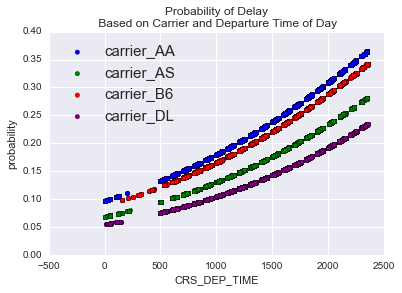

In [124]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)
lines, labels = ax.get_legend_handles_labels()

    
ax.set(title='Probability of Delay\n Based on Carrier and Departure Time of Day')
ax.legend(lines[:2], labels=features, loc='upper left',fontsize=15)  # legend for first two lines only

In [125]:
zip(features,colors)

[('carrier_AA', 'blue'),
 ('carrier_AS', 'green'),
 ('carrier_B6', 'red'),
 ('carrier_DL', 'purple')]

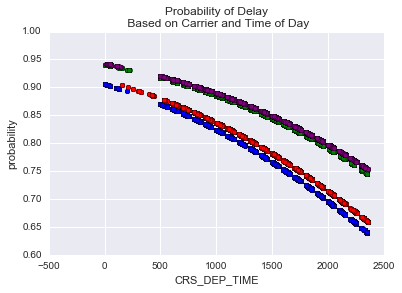

In [126]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[0]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Delay\n Based on Carrier and Time of Day')

In [127]:
zip(features,colors)

[('carrier_AA', 'blue'),
 ('carrier_AS', 'green'),
 ('carrier_B6', 'red'),
 ('carrier_DL', 'purple')]

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [128]:
from sklearn import dummy, metrics

In [129]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [130]:
df['DEP_DEL15'].value_counts()

0.0    367333
1.0     90978
Name: DEP_DEL15, dtype: int64

[(0, 1),
 (0, 1),

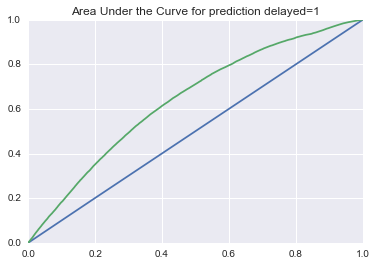

In [131]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [132]:
metrics.roc_auc_score(df.DEP_DEL15, df.probability_1)

0.64160264851953952

#### ADVANCED BONUS QUESTION : 
Create a "Time_Of_Day" column that states whether the flight departure time is morning (4am - 11am), afternoon (11am - 6pm) or night (6pm - midnight) or late night (midnight to 4am)

In [104]:
time_windows = {"morning":[400,1100],"afternoon":[1101,1800], \
                "night":[1801,2400],"late_night":[0,359]}
    
df["Time_Of_Day"] = df.DEP_TIME.apply(lambda time : \
            [key for key,val in time_windows.iteritems() if (time>=val[0]) and (time<=val[1])])
df.Time_Of_Day = df.Time_Of_Day.apply(lambda x : x[0] )
newdf = df[features[1:]].join(pd.get_dummies(df.Time_Of_Day))
model.fit(newdf, df['DEP_DEL15'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
zip(newdf.columns,model.coef_[0])

[('carrier_AS', -0.53335490805895602),
 ('carrier_B6', 0.15516969026809904),
 ('carrier_DL', -0.44496400588794449),
 ('carrier_EV', 0.014064050454807523),
 ('carrier_F9', 0.40459293210152425),
 ('carrier_HA', -0.58460720637956798),
 ('carrier_MQ', 0.5572975821802596),
 ('carrier_NK', 0.23174210054582375),
 ('carrier_OO', 0.15157439983534368),
 ('carrier_UA', 0.3792851382810658),
 ('carrier_US', -0.37564020965639139),
 ('carrier_VX', -0.14729139033613928),
 ('carrier_WN', 0.13598837592849142),
 ('CRS_DEP_TIME', -0.0010901199618748149),
 ('afternoon', 0.10727010327042182),
 ('late_night', 0.27949983950764462),
 ('morning', -1.5266378420597428),
 ('night', 1.2405876975714634)]

#### Visualizing Precision / Recall (with cleaner code)

In [134]:

model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]


model = lm.LogisticRegression()
model.fit(df[features[1:]], df.DEP_DEL15)
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


[(0, 1),
 (0, 1),

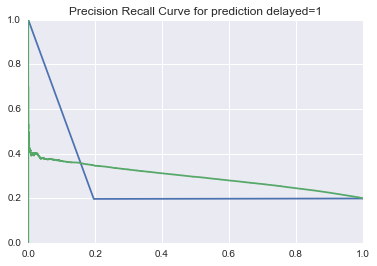

In [135]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

Using models built from the flight data problem earlier in class, work through the same
problems. Your data and models should already be accessible. Your goals:

1. There are many ways to manipulate this data set. Consider what is a proper "categorical" variable, and keep only what is significant. You will easily have 20+ variables. Aim to have at least three visuals that clearly explain the relationship of variables you've used against the predictive survival value.
2. Generate the AUC or precision-recall curve (based on which you think makes more sense), and have a statement that defines, compared to a baseline, how your model performs and any caveats. For example: "My model on average performs at x rate, but the features under-perform and explain less of the data at these thresholds." Consider this as practice for your own project, since the steps you'll take to present your work will be relatively similar.

[(0, 1),
 (0, 1),

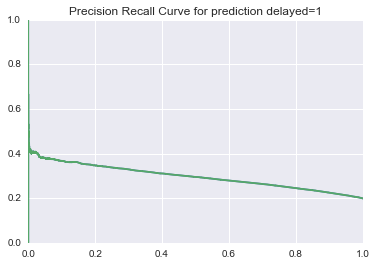

In [138]:
# add all features

features = [i for i in df.columns if 'carrier_' in i]
features += [i for i in df.columns if 'dow_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features]).T[1]

ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability'])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for all features', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

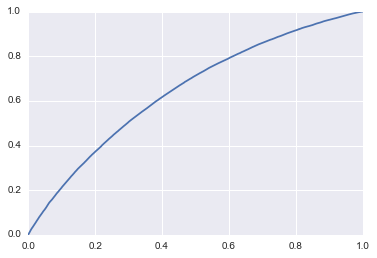

In [139]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability)
ax.plot(vals[0], vals[1])

In [140]:
metrics.roc_auc_score(df.DEP_DEL15, df.probability)

0.64712869356934621